In [22]:
import numpy as np

# Parámetros de la distribución uniforme
a, b = 0, 10
n = 5

# Generar muestra aleatoria de X ~ U(0,10)
muestra = np.random.uniform(a, b, n)
print(muestra)

[2.1312344  6.78202131 2.30704057 7.53052761 4.41506886]


In [9]:
import numpy as np
muestra = np.array([0.2299, 1.0923, 7.3165, 8.0846, 1.0819])
media_observada = np.mean(muestra)
print(media_observada)

3.5610400000000006


In [10]:
import numpy as np

# Parámetros
a, b = 0, 10
n = 5
m = 10000

# Generar m medias muestrales
medias_muestrales = [np.mean(np.random.uniform(a, b, n)) for _ in range(m)]

# Convertir a numpy array para facilidad de análisis
medias_muestrales = np.array(medias_muestrales)

# Mostrar algunas de las medias obtenidas
print(medias_muestrales[:10])  # Muestra las primeras 10 medias


[2.66120328 6.18647905 2.95556099 5.38909247 6.82345958 3.46393705
 4.28006134 4.71369893 5.49153518 6.14528536]


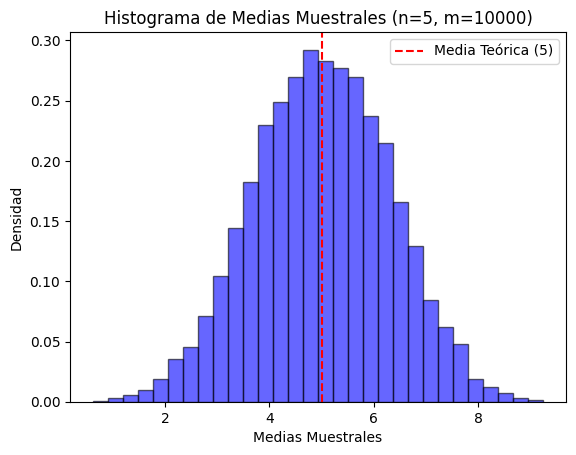

In [11]:
import matplotlib.pyplot as plt

# Graficar histograma de las medias muestrales
plt.hist(medias_muestrales, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Medias Muestrales')
plt.ylabel('Densidad')
plt.title(f'Histograma de Medias Muestrales (n={n}, m={m})')
plt.axvline(x=5, color='red', linestyle='dashed', label='Media Teórica (5)')
plt.legend()
plt.show()

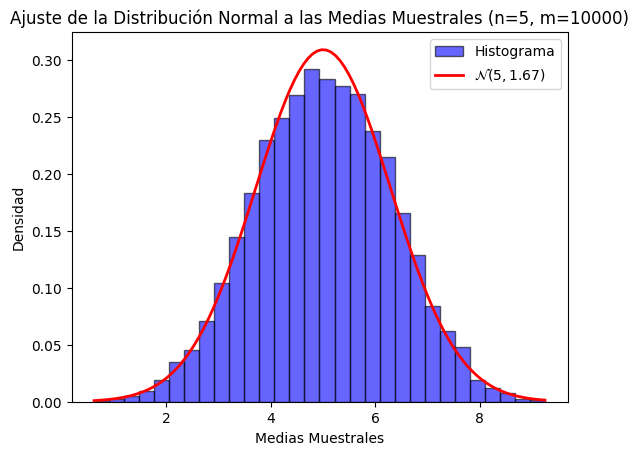

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal teórica
mu = 5
sigma = np.sqrt(8.33 / n)

# Valores del eje x para la distribución normal
x = np.linspace(min(medias_muestrales), max(medias_muestrales), 100)

# Evaluar la densidad de probabilidad de la normal en x
pdf_normal = norm.pdf(x, mu, sigma)

# Graficar histograma de las medias muestrales
plt.hist(medias_muestrales, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Histograma')

# Superponer la curva de la distribución normal
plt.plot(x, pdf_normal, 'r-', linewidth=2, label=r'$\mathcal{N}(5, 1.67)$')

# Etiquetas y título
plt.xlabel('Medias Muestrales')
plt.ylabel('Densidad')
plt.title(f'Ajuste de la Distribución Normal a las Medias Muestrales (n={n}, m={m})')
plt.legend()
plt.show()

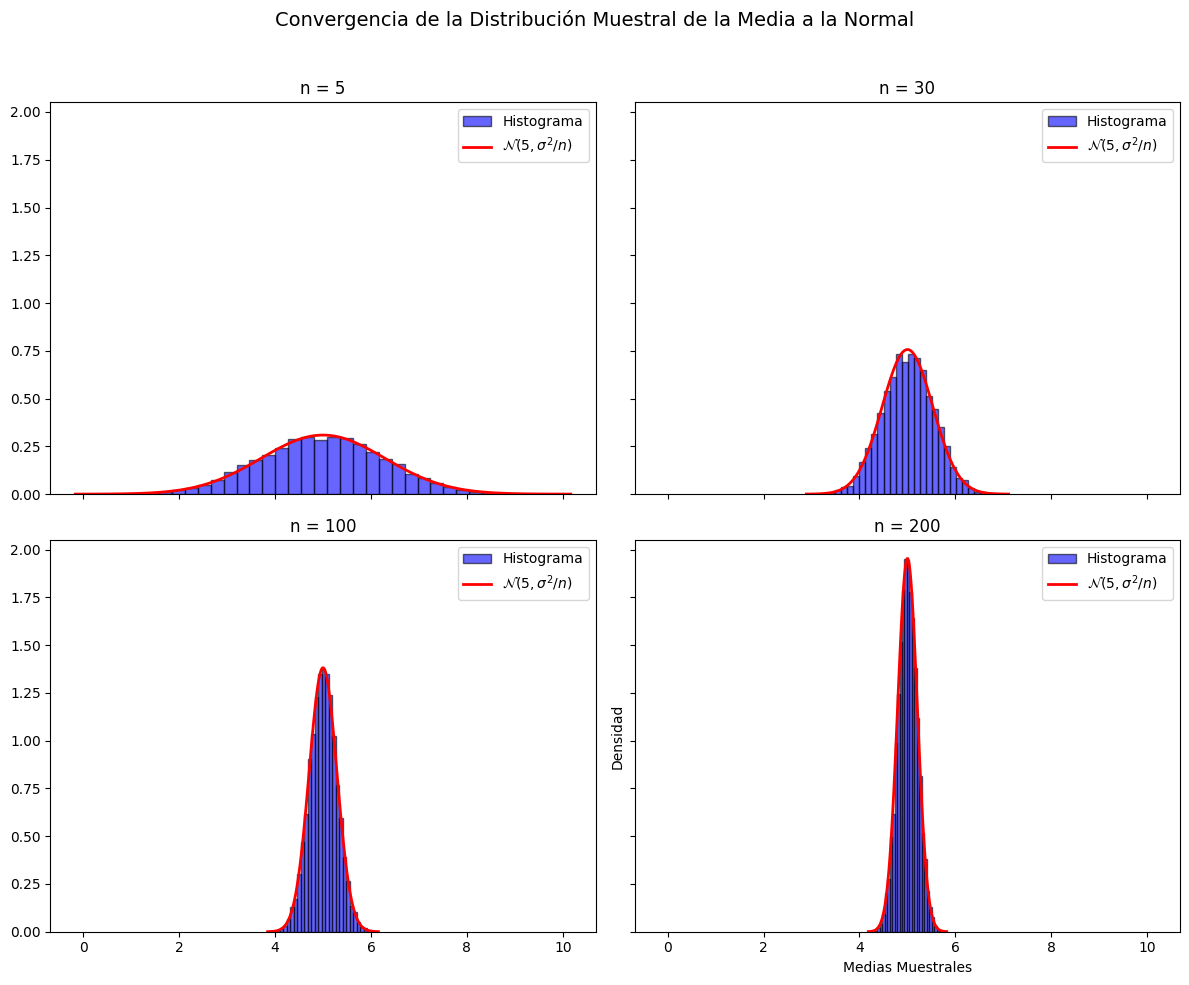

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros generales
a, b = 0, 10
m = 10000
n_values = [5, 30, 100, 200]
mu = (a + b) / 2
sigma2 = ((b - a) ** 2) / 12

# Crear subgráficos 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

for i, n in enumerate(n_values):
    # Generar m medias muestrales para cada n
    medias_muestrales = [np.mean(np.random.uniform(a, b, n)) for _ in range(m)]
    
    # Parámetros de la normal teórica
    sigma_n = np.sqrt(sigma2 / n)
    x = np.linspace(mu - 4*sigma_n, mu + 4*sigma_n, 100)
    pdf_normal = norm.pdf(x, mu, sigma_n)
    
    # Seleccionar la posición correcta en la cuadrícula
    ax = axes[i // 2, i % 2]
    
    # Graficar el histograma
    ax.hist(medias_muestrales, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Histograma')
    
    # Superponer la distribución normal teórica
    ax.plot(x, pdf_normal, 'r-', linewidth=2, label=r'$\mathcal{N}(5, \sigma^2/n)$')
    
    # Título y etiquetas
    ax.set_title(f"n = {n}")
    ax.legend()

# Configuración general
fig.suptitle("Convergencia de la Distribución Muestral de la Media a la Normal", fontsize=14)
plt.xlabel('Medias Muestrales')
plt.ylabel('Densidad')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

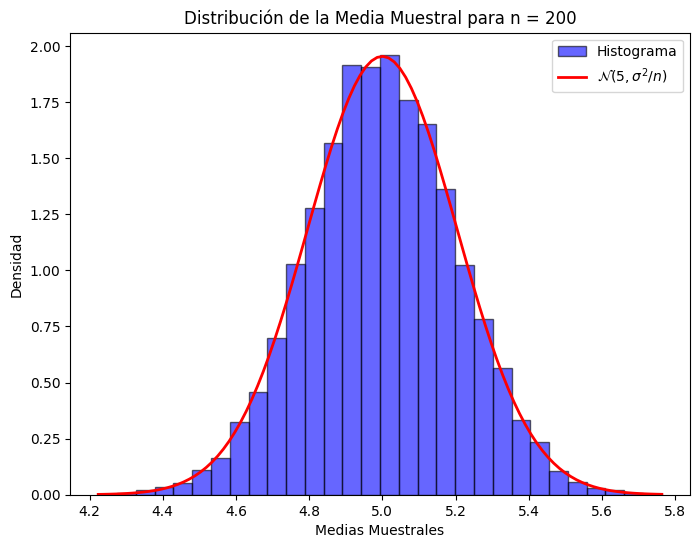

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
a, b = 0, 10
m = 10000
n = 200
mu = (a + b) / 2
sigma2 = ((b - a) ** 2) / 12

# Generar m medias muestrales para n=200
medias_muestrales = [np.mean(np.random.uniform(a, b, n)) for _ in range(m)]

# Parámetros de la normal teórica
sigma_n = np.sqrt(sigma2 / n)
x = np.linspace(min(medias_muestrales), max(medias_muestrales), 100)
pdf_normal = norm.pdf(x, mu, sigma_n)

# Graficar el histograma
plt.figure(figsize=(8, 6))
plt.hist(medias_muestrales, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Histograma')

# Superponer la distribución normal teórica
plt.plot(x, pdf_normal, 'r-', linewidth=2, label=r'$\mathcal{N}(5, \sigma^2/n)$')

# Etiquetas y título
plt.xlabel('Medias Muestrales')
plt.ylabel('Densidad')
plt.title("Distribución de la Media Muestral para n = 200")
plt.legend()
plt.show()

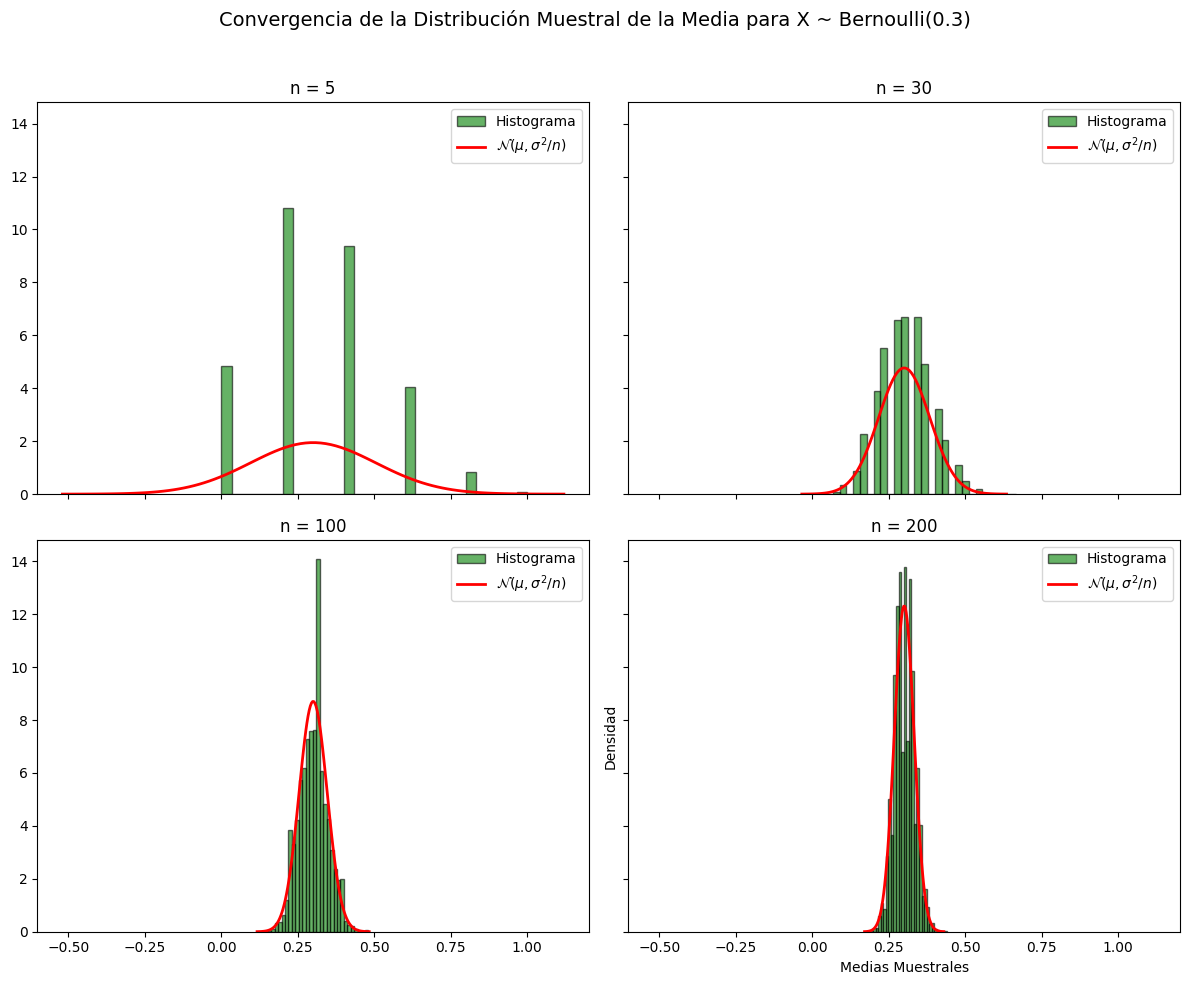

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución Bernoulli
theta = 0.3
n_values = [5, 30, 100, 200]
m = 10000

# Esperanza y varianza teóricas
mu = theta
sigma2 = theta * (1 - theta)

# Crear subgráficos 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

for i, n in enumerate(n_values):
    # Generar m medias muestrales para cada n
    medias_muestrales = [np.mean(np.random.binomial(1, theta, n)) for _ in range(m)]
    
    # Parámetros de la normal teórica
    sigma_n = np.sqrt(sigma2 / n)
    x = np.linspace(mu - 4*sigma_n, mu + 4*sigma_n, 100)
    pdf_normal = norm.pdf(x, mu, sigma_n)
    
    # Seleccionar la posición correcta en la cuadrícula
    ax = axes[i // 2, i % 2]
    
    # Graficar el histograma
    ax.hist(medias_muestrales, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histograma')
    
    # Superponer la distribución normal teórica
    ax.plot(x, pdf_normal, 'r-', linewidth=2, label=r'$\mathcal{N}(\mu, \sigma^2/n)$')
    
    # Título y etiquetas
    ax.set_title(f"n = {n}")
    ax.legend()

# Configuración general
fig.suptitle("Convergencia de la Distribución Muestral de la Media para X ~ Bernoulli(0.3)", fontsize=14)
plt.xlabel('Medias Muestrales')
plt.ylabel('Densidad')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


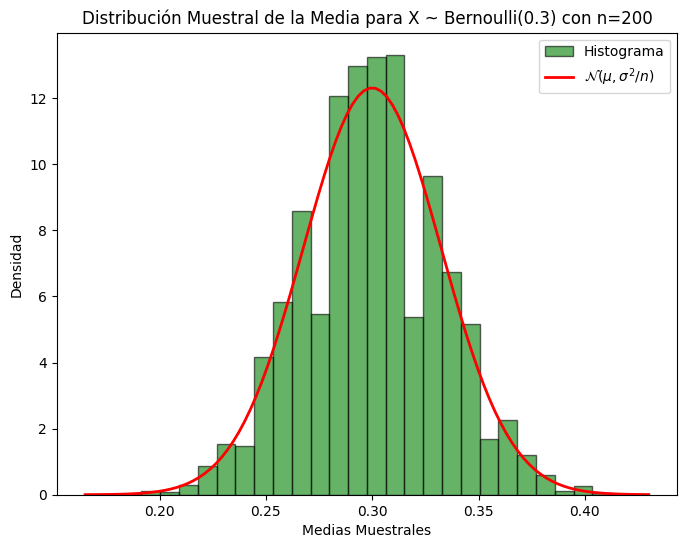

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
theta = 0.3
n = 200
m = 10000

# Esperanza y varianza teóricas
mu = theta
sigma2 = theta * (1 - theta)

# Generar m medias muestrales
medias_muestrales = [np.mean(np.random.binomial(1, theta, n)) for _ in range(m)]

# Parámetros de la normal teórica
sigma_n = np.sqrt(sigma2 / n)
x = np.linspace(min(medias_muestrales), max(medias_muestrales), 100)
pdf_normal = norm.pdf(x, mu, sigma_n)

# Graficar histograma con escala ajustada
plt.figure(figsize=(8, 6))
plt.hist(medias_muestrales, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histograma')

# Superponer la distribución normal teórica
plt.plot(x, pdf_normal, 'r-', linewidth=2, label=r'$\mathcal{N}(\mu, \sigma^2/n)$')

# Etiquetas y título
plt.xlabel('Medias Muestrales')
plt.ylabel('Densidad')
plt.title("Distribución Muestral de la Media para X ~ Bernoulli(0.3) con n=200")
plt.legend()
plt.show()
